# Подбор параметров распределения

Когда мы характеризуем любую выборку чисел двумя параметрами - средним и стандратным отклонением, то подразумеваем, что выборка приближенно описывается нормальным распределением.

Однако распределение значений времени сенсомоторных реакций несимметричное и более точно описывается с помощью других распределений. 
Рекомендуемый способ получить коэффициенты таких распределений: экспортировать подвыборки ваших данных в текстовые файлы и подобрать модели с помощью интерактивного онлайн-приложения  https://sherdim.shinyapps.io/retivo/ .

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [4]:
#загрузка данных
# u='http://balatte.stireac.com/result.tsv/sherdim%40gmail.com/tuts__2143043410150713'
u = 'd/rt.tsv'
D = pd.read_csv(u, delimiter='\t')
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       48 non-null     float64
 1   v       45 non-null     float64
dtypes: float64(2)
memory usage: 896.0 bytes


Для анализа распределений нужно разделить реакции по типу стимула.
Первая половина - зрительно-моторные реакции, вторая - слухомоторные.

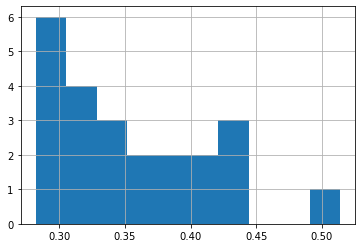

In [6]:
D['stimul'] = where(D.index < len(D)//2 , 'v', 'a')

Dv = D.loc[D.stimul=='v'].dropna()
Dv.v.hist();

Гистограмма распределения времени реакции в большинстве случаев скошена влево.

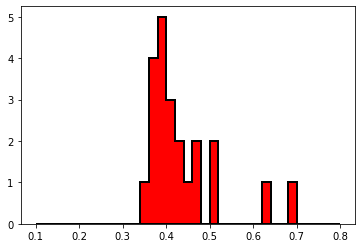

In [14]:
Da = D.loc[D.stimul=='a'].dropna()
hist(Da.v, bins=arange(0.1,.81,.02), histtype='stepfilled', color='r', ec='k', lw=2);

## Извлечение подвыборок для внешнего использования

Для анализа подвыборки в приложении https://sherdim.shinyapps.io/retivo/ нужно сохранить только часть значений в 2-х колонках.


Так как мы повторяем однотипную операцию, то сделаем это в цикле.

In [10]:
for stim in ['v','a']:
    D.loc[D['stimul']==stim, ['t','v']].dropna().to_csv(f'rt_{stim}.tsv', sep='\t', index=False)

В текущей папке сохранились два файла - один со зрительными реакциями, второй со слуховыми.

Теперь надо перейти в [онлайн-приложение](https://sherdim.shinyapps.io/retivo/), загрузить файл туда и подобрать наиболее подходящее распределение {numref}`retivo`.
Чем больше у распределения параметров, тем сложнее подобрать их значения. Некоторые комбинации параметров подобрать не удается.

::: {figure} retivo

![](i/retivo.png)

Внешний вид приложения с результатами подбора параметров трехпараметрического экспоненциально-гауссова распределения.
:::